# **Final Project**

# **Project Name: To Predict Income with the help of Machine Learning Model**


## Submitted By: 
 ##                 **1. Bhagyashree Chavan**
 ##                 **2. Gulkhan Anassova**
 ##                 **3. Trineth Reddy**


# **Course: DS 630 Machine learning**

# **Professor: Dr. Wang**

### **Objective: Predicting salary income class with help of machine learning model**

### **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import statsmodels.api as sm
from IPython.display import Markdown, display
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%  matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

**Importing the adult dataset**

In [ ]:
# Importing the dataset
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['adult.csv']))

Sample dataset for understanding 

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
print (df.shape)

(48842, 15)


### The full dimension of data which is made up of 48842 rows and 15 columns.

In [ ]:
# Obtain summary stataistics of the data
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Investigate further to know the various types of the columns and count of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# **Data cleaning or Data preprocessing**

**Missing Values**

In [ ]:
# Counting the number of missing values for each feature
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

With the above results there are no null values but we still need to find out special characters present in the data.

### Now we are further processing 

## **Special Characters**

In [ ]:
print ('Special Characters')
for i,j in zip(df.columns,(df.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

Special Characters
workclass: 2799 records
occupation: 2809 records
native-country: 857 records


In [ ]:
# code will replace the special character to nan and then drop the columns 
df['native-country'] = df['native-country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [ ]:
#Finding if special characters are present in the data 
df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
print (df.shape)

(45222, 15)


The data is reduced by 3620 rows 

1. First, replace all the ‘?’ with NaN(NaN is used as a placeholder for missing data in pandas), to do that, use python’s string replace() function with NumPy’s(imported as np earlier) nan.

2. Second, Use the .dropna() function to drop the rows with missing values. dropna() can drop either columns or rows, by default, it will delete rows if the axis keyword is not mentioned. how=’any’ will remove the rows if any missing values are present in them. 

# **Exploratory data analysis**

In [ ]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

**Income target variable distribution**



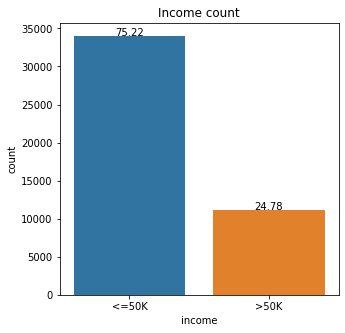

In [ ]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Income count')
plt.show()

In income there is 2 group, group1(who earns more than 50k) 25% belong to income and group2(who earns less than 50k) 75% belong to income

In [ ]:
df['gender'].value_counts()

Male      30527
Female    14695
Name: gender, dtype: int64

In [ ]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in df[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

### **Marital-status distribution**

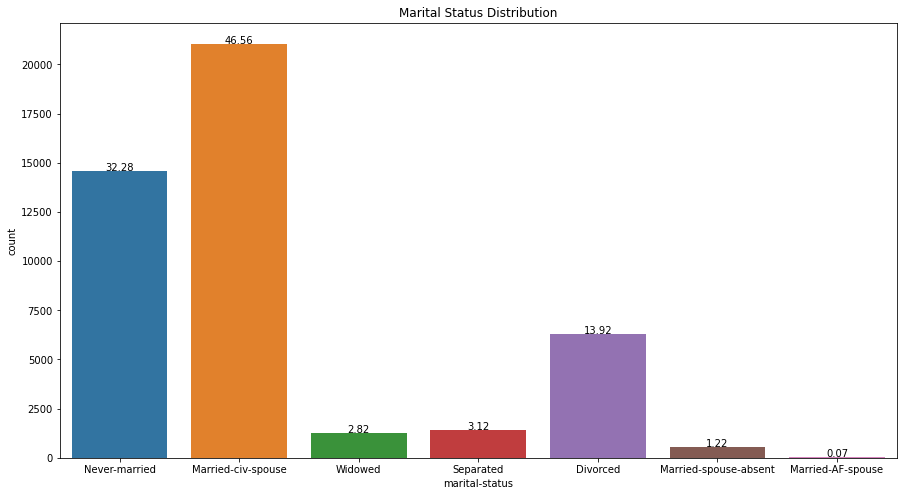

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Marital Status Distribution')
plt.show()

Married-civ-spouse has maximum number of samples. Married-AF-spouse has minimum number of obs.

### **Relationship distribution**

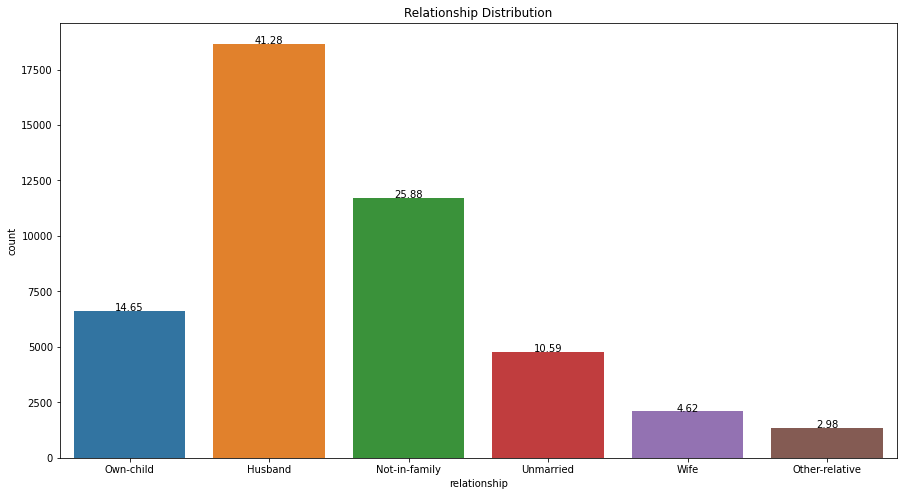

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="relationship", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Relationship Distribution')
plt.show()

Husband has maximum percentage among all.

# **Race distribution**

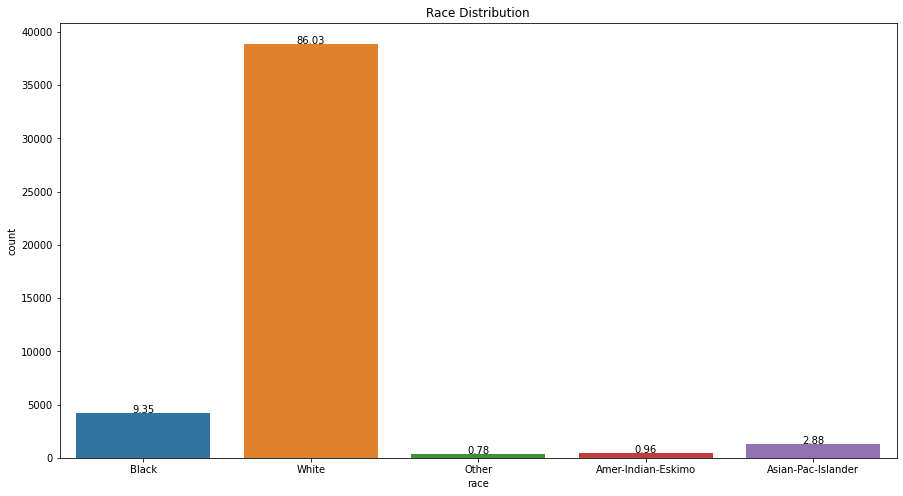

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Race Distribution')
plt.show()


White is maximun among all about 85.50%. Black is second maximun.

### **Education level vs Income level**

In [ ]:
adult = df

we are plotting this a bar graph to show the proportion of income classes versus education levels in the figure below. 

we are going to see from the bar graph below that as the education level increase, the proportion of people who earn more than 50k a year also increase. 

Education vs Income


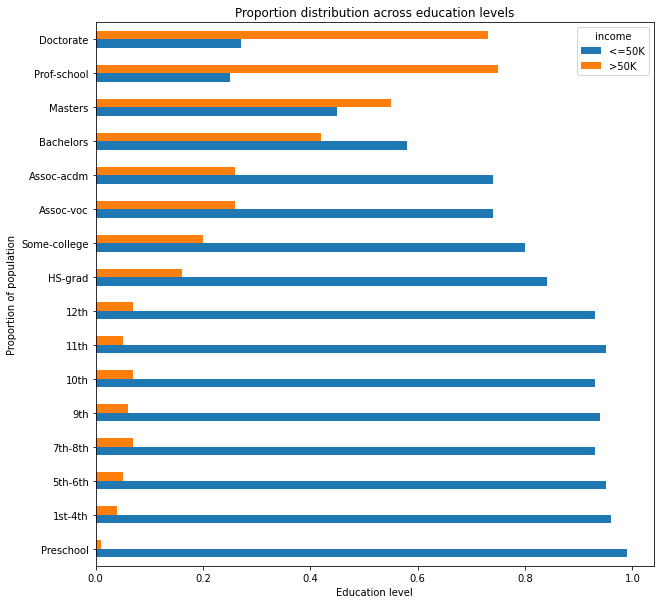

In [ ]:
import matplotlib.pyplot as plt 
print ('Education vs Income')

education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='barh', title = 'Proportion distribution across education levels', figsize = (10,10))
# plot grouped bar chart  

ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')
plt.show()

So the above graph saying only after doing master;s degree, majority people earning more than 50k per year 


### **Gender and Income Distribution** 

1.   List item
2.   List item



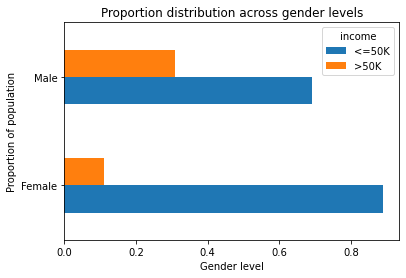

In [ ]:
gender = round(pd.crosstab(adult.gender, adult.income).div(pd.crosstab(adult.gender, adult.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='barh', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')
plt.show()

From the above graph we can see the gap between male and females, but we do not have exact value of the income so we are limited to observe data



### **Work class with income**

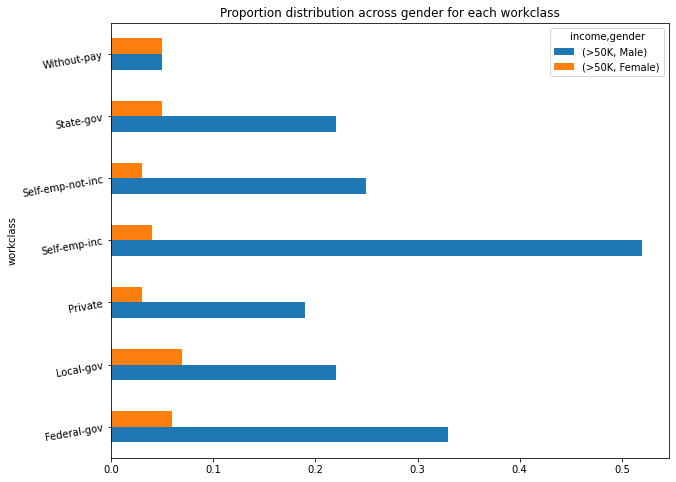

In [ ]:
gender_workclass = round(pd.crosstab(adult.workclass, 
                                     [adult.income, adult.gender]).div(pd.crosstab(adult.workclass, 
                                                                                   [adult.income, adult.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'barh', 
                                                            title = 'Proportion distribution across gender for each workclass', 
                                                            figsize = (10,8), rot = 10)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')
plt.show()

We see the above figure except 'without.pay' working class where both getting same pay scale but men's paid higher proportion earning more than 50k a year than women



### **Occupation vs proportion of population**

Text(0, 0.5, 'Proportion of population')

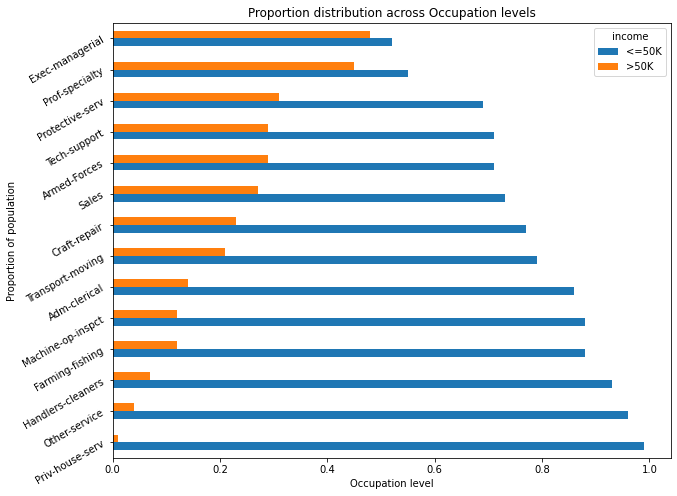

In [ ]:
occupation = round(pd.crosstab(adult.occupation, adult.income).div(pd.crosstab(adult.occupation, adult.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='barh', title = 'Proportion distribution across Occupation levels', figsize = (10,8), rot = 30)
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

### **Population with work class distribution**

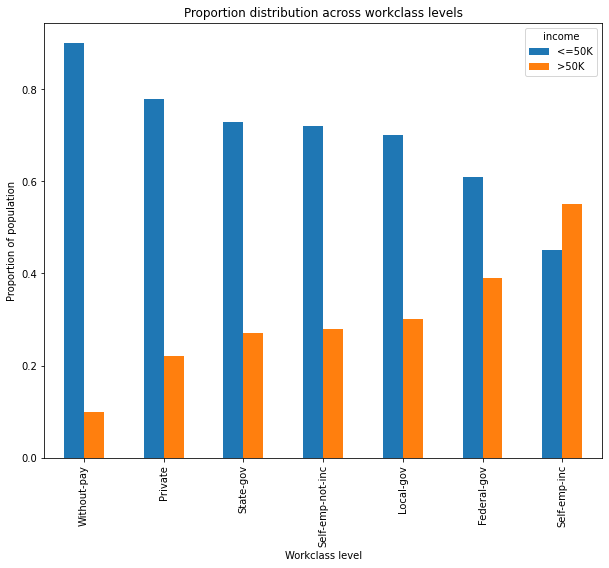

In [ ]:
workclass = round(pd.crosstab(adult.workclass, adult.income).div(pd.crosstab(adult.workclass, adult.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')
plt.show()

### **Population with Race distribution**

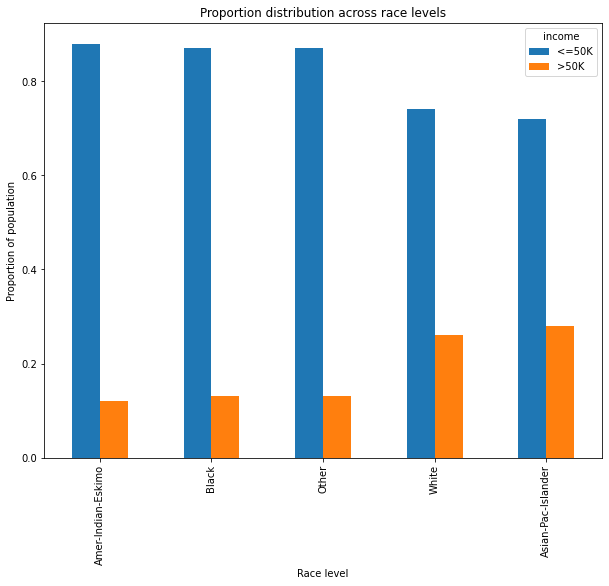

In [ ]:
race = round(pd.crosstab(adult.race, adult.income).div(pd.crosstab(adult.race, adult.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')
plt.show()

Text(0, 0.5, 'Proportion of population')

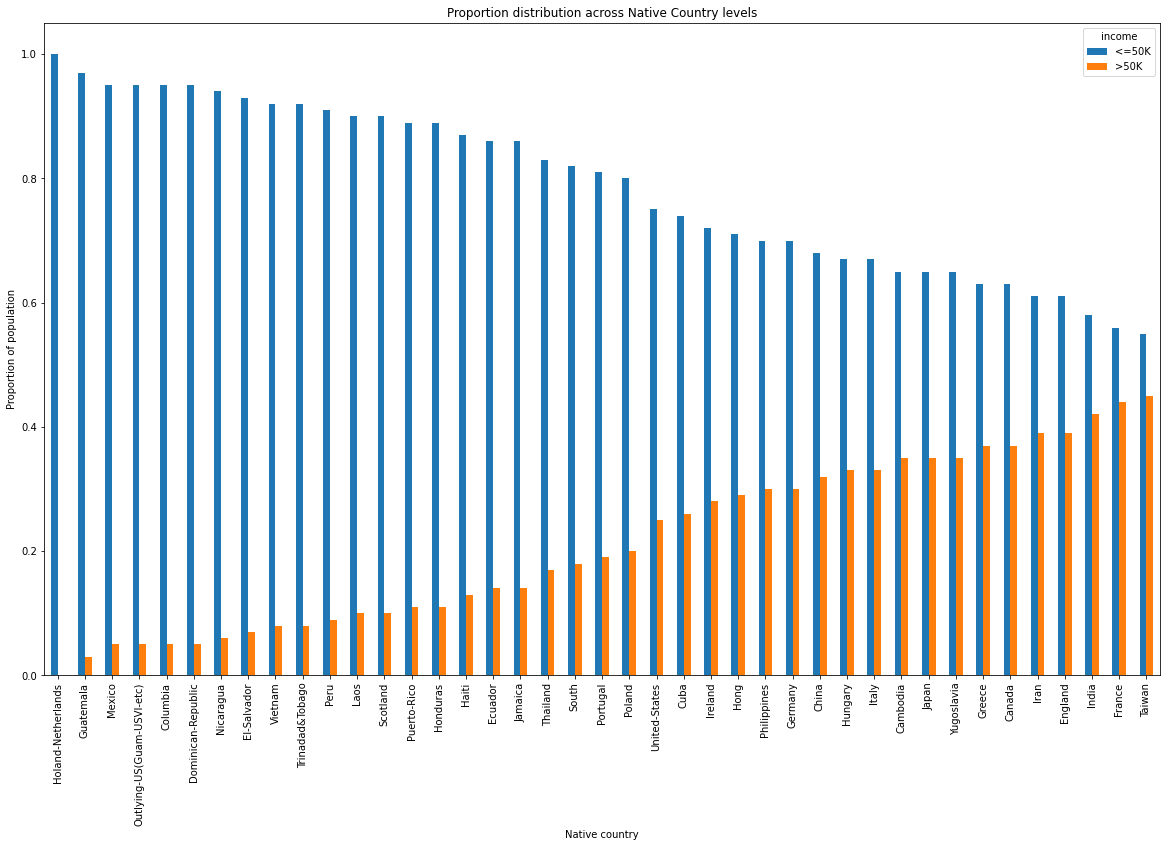

In [ ]:
native_country = round(pd.crosstab(adult['native-country'], 
                                   adult.income).div(pd.crosstab(adult['native-country'], adult.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')


1. The above graph giving idea of the proporation of income class with the native country. we are noticing trend from the graph that south American has low proportion of people makes more than 50k.

2. On the other hand Asia, makes higher proportion of population have more than 50k a year.

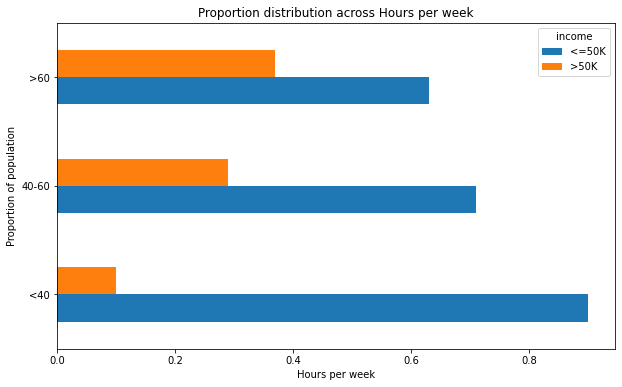

In [ ]:
adult['hour_worked_bins'] = ['<40' if i < 40 else '40-60' if i <= 60 else '>60'  for i in adult['hours-per-week']]
adult['hour_worked_bins'] = adult['hour_worked_bins'].astype('category')
hours_per_week = round(pd.crosstab(adult.hour_worked_bins, adult.income).div(pd.crosstab(adult.hour_worked_bins, adult.income).apply(sum,1),0),2)

hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='barh', title = 'Proportion distribution across Hours per week', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')
plt.show()

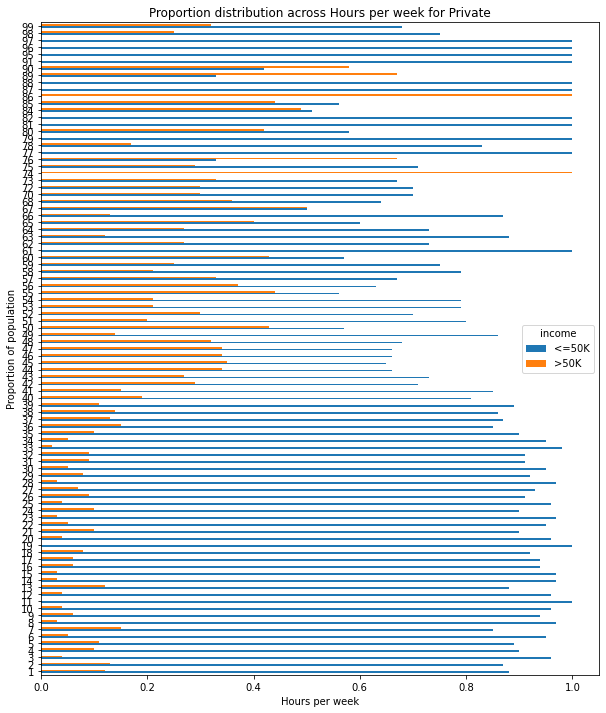

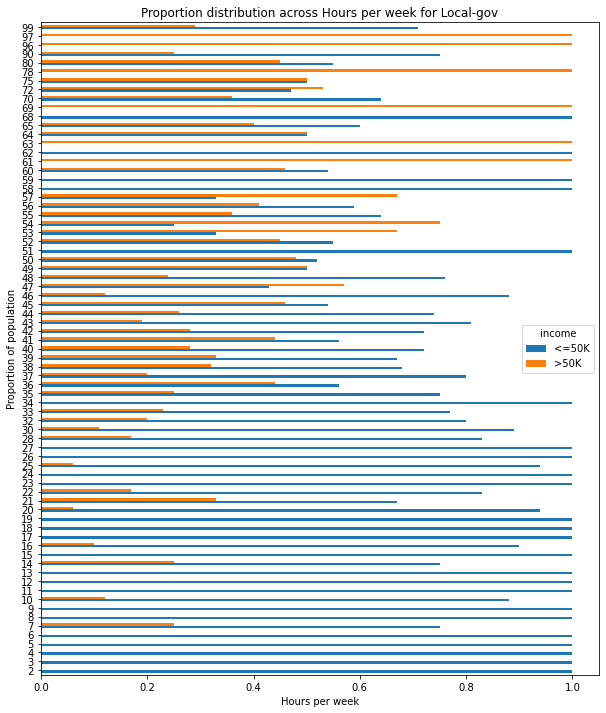

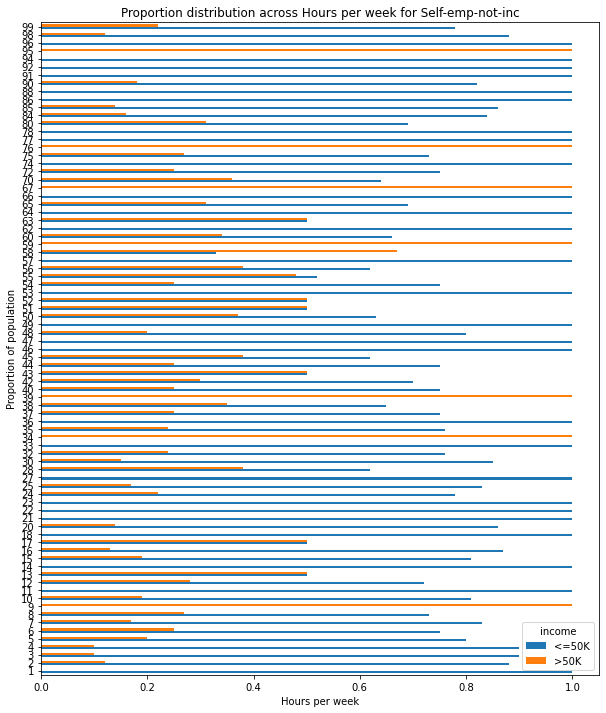

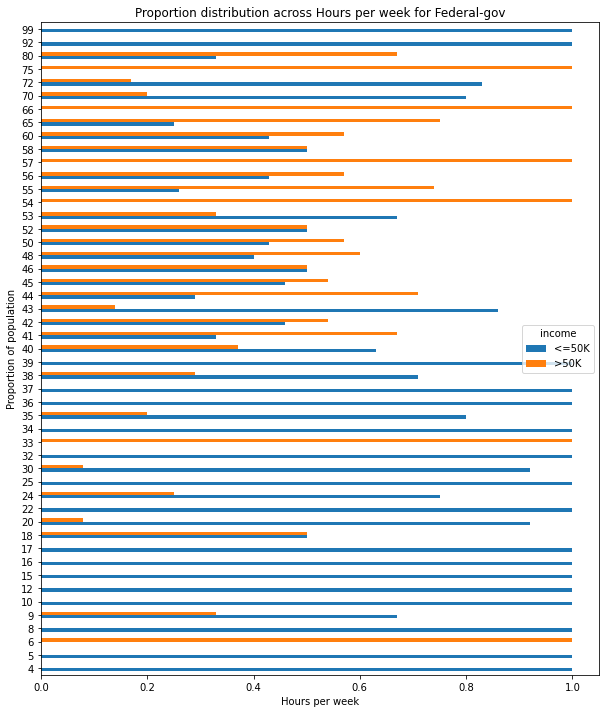

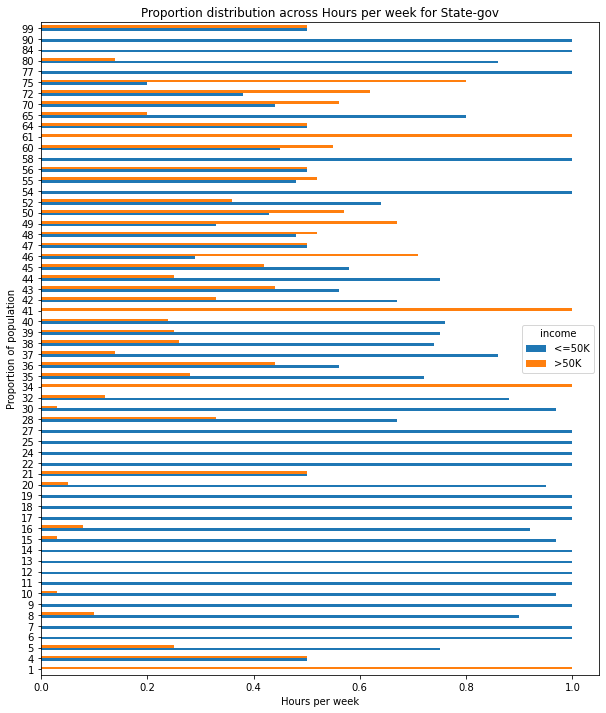

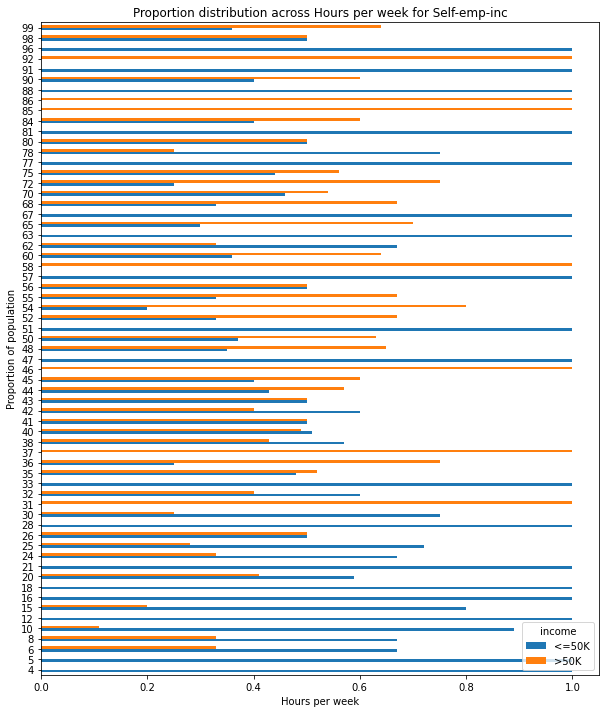

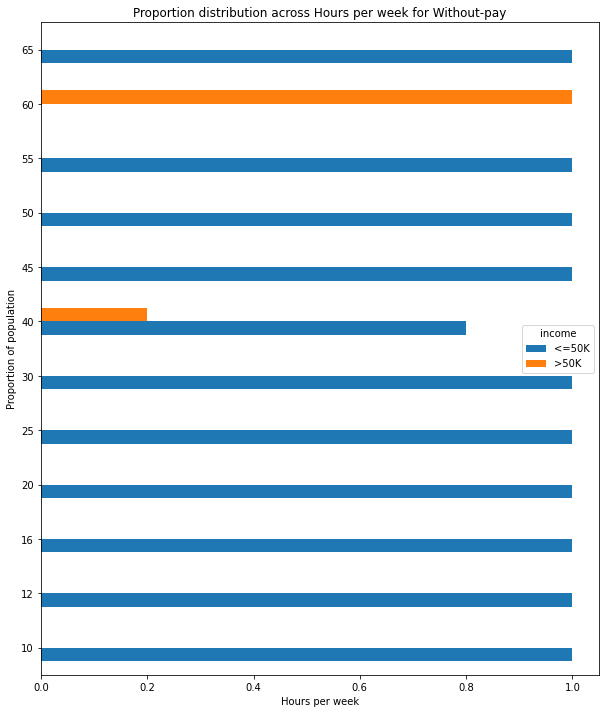

In [ ]:
for i in adult.workclass.unique():
    df = adult[adult.workclass == i]
    hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)
    ax = hours_per_week.plot(kind ='barh', title = 'Proportion distribution across Hours per week for '+ i, figsize = (10,12))
    ax.set_xlabel('Hours per week')
    ax.set_ylabel('Proportion of population')

plt.show()

### **Boxplot(Age with income)**

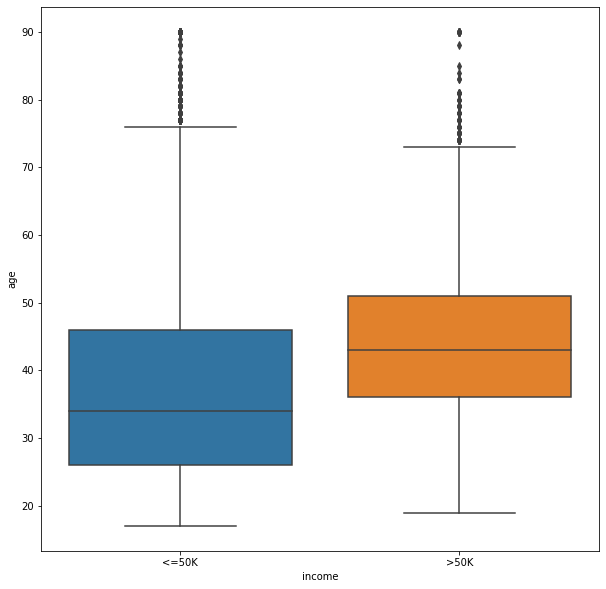

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=adult)
plt.show()

In [ ]:
df = adult 

In [ ]:
df[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.006067
0,<=50K,36.749427


The mean "age" for Income group(<=50k) is 36.8 years

And for Income group(>50k) is 44.2 years

# **Feature engineering**

Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. Some of the data provided are Categorical data like WorkClass, Education, Marital-Status, Occupation, Relationship, etc. we need to convert these into numerical notations.

In [ ]:
#running a loop of value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

Here we ran a for loop over all the columns using the .value_counts() function of Pandas which gets us the count of unique values. 

We can see that some of the data provided are unique like the ‘workclass’ attribute which has only 7 distinct values 

some columns have a lot of distinct values like fnlgwt attribute which has around 2000+ values. So, let’s drop the attributes that have noisy data.


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'hour_worked_bins'],
      dtype='object')

In [ ]:
#dropping based on uniquness of data from the dataset 
df.drop(['educational-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss', 'native-country','hour_worked_bins'], axis = 1, inplace=True)

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'income'],
      dtype='object')

In [ ]:
# Let's see how many unique categories we have in this gender property
gender = set(df['gender'])
print(gender)

{'Male', 'Female'}


In [ ]:
#Mapping the values to numerical values 
#gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

#marital
df['marital-status'] = df['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
 
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  int64 
 2   education       45222 non-null  int64 
 3   marital-status  45222 non-null  int64 
 4   occupation      45222 non-null  int64 
 5   relationship    45222 non-null  int64 
 6   race            45222 non-null  int64 
 7   gender          45222 non-null  int64 
 8   income          45222 non-null  object
dtypes: int64(8), object(1)
memory usage: 4.7+ MB


In [ ]:
# Let's see how many unique categories we have in this property
income = set(df['income'])
print(income)

{'<=50K', '>50K'}


In [ ]:
#mapping the data into numerical data using map function
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45222 non-null  int64
 1   workclass       45222 non-null  int64
 2   education       45222 non-null  int64
 3   marital-status  45222 non-null  int64
 4   occupation      45222 non-null  int64
 5   relationship    45222 non-null  int64
 6   race            45222 non-null  int64
 7   gender          45222 non-null  int64
 8   income          45222 non-null  int64
dtypes: int64(9)
memory usage: 4.7 MB


In [ ]:
df.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,gender,income
0,25,5,11,5,6,5,0,0,0
1,38,5,3,2,1,4,3,0,0
2,28,4,9,2,14,4,3,0,1
3,44,5,0,2,6,4,0,0,1
5,34,5,13,5,13,0,3,0,0


**Splitting the dataset into 70% of training and 30% testing data**

In [ ]:
scaler = StandardScaler()
df1 = df.drop('income', axis=1) 
X = scaler.fit_transform(df1)
y = df['income'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11310)

**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=150, random_state=123,max_depth=6)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest Classifier', metrics.accuracy_score(y_test, y_pred))

Accuracy of Random Forest Classifier 0.8146237193189356


**Decision tree**

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=123)
tree.fit(X_train, y_train)
y_pred1= tree.predict(X_test)
print('Accuracy of Decision tree:', metrics.accuracy_score(y_test, y_pred1))

Accuracy of Decision tree: 0.8143288862681507


**Random forest with grid search cv**

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [ ]:
rfc1 = RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred2 = rfc1.predict(X_test)
print('Accuracy of Random Forest tree with grid search:', metrics.accuracy_score(y_test, y_pred2))

Accuracy of Random Forest tree with grid search: 0.8240583769440555


**Decision tree with grid search cv**

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
param_dict = { 
    'min_samples_split': range(1,10),
    'max_depth': range(1,10),
    'min_samples_leaf' : range(1,5),
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(decision_tree, param_grid=param_dict, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1402 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [ ]:
decision_tree1 = DecisionTreeClassifier(criterion = 'entropy',
 max_depth = 9,
 min_samples_leaf = 4,
 min_samples_split = 4)

In [ ]:
decision_tree1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred3 = decision_tree1.predict(X_test)
print('Accuracy of Decision tree with grid search:', metrics.accuracy_score(y_test, y_pred3))

Accuracy of Decision tree with grid search: 0.8152133854205056


**Ada boost classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)                     
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print('Accuracy of Adaboost:', metrics.accuracy_score(y_test, ada_pred))

Accuracy of Adaboost: 0.8283334561804379


## **Conclusion**

*   In the project, we have seen the highest accuracy was obatined from the 
    **Adaboost classifier model**. The best accuracy we got on this dataset was **82.833%**.
*   The accuracy was close to each other but Adaboost gave slightly better accuracy as compared to other two models which was used in this project.









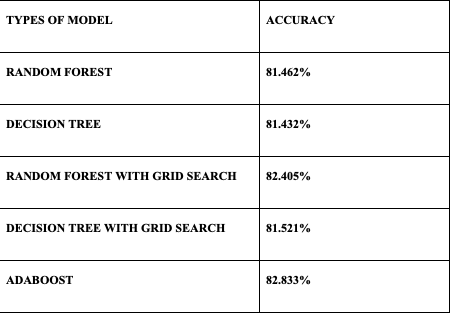

# **What we have learned form this project?**

We have learned so many concepts and practiced of machine learning, those are listed below:

1.   We have learned about how to find out different types of analysis in EDA like three variable together (Population with work class distribution with Income)

2.   In feature engineering we have learned about mapping and then using this function StandardScaler() to normalize data

3.  Here we explored more deeper in scikit-learn libraries and its functions

4. We have learned several machine learning classifier models and Grid Search technique with deep understanding 

5. Learning about how classifiers fits into the data and then comparing which classifiers are great for the model

3. Learning new concepts and methods to get accurate results in this test.


## **REFERENCES**


[1]        https://archive.ics.uci.edu/ml/datasets/adult

[2]	Hands-on machine learning with Scikit-Learn & TensorFlow: concepts, tools, and techniques to build intelligent systems
Géron - O'Reilly Media, Inc. – 2019

[3] 	sklearn.ensemble.RandomForestClassifier¶
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[4]   AdaBoost Classifier in Python
https://www.datacamp.com/community/tutorials/adaboost-classifier-python

[5]	Your Machine Learning and Data Science Community
https://www.kaggle.com/

[6]	  EDA of Adult Census Income Dataset
Aamir
https://medium.com/data-warriors/eda-of-adult-census-income-dataset-cc9ac1a3d552

[7]	  Statistical comparison of models using grid search¶
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py